In [1]:
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline

# Load and Sanitize

In [2]:
df = pd.read_excel('data/hourly-price-data.xls', parse_dates=['Date'])

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [3]:
df.head()

,Load Area,Service Class,Voltage Level,Date,Hour Ending 01:00,Hour Ending 02:00,Hour Ending 03:00,Hour Ending 04:00,Hour Ending 05:00,Hour Ending 06:00,...,Hour Ending 15:00,Hour Ending 16:00,Hour Ending 17:00,Hour Ending 18:00,Hour Ending 19:00,Hour Ending 20:00,Hour Ending 21:00,Hour Ending 22:00,Hour Ending 23:00,Hour Ending 24:00
0,Central,SC-3 HP,Primary,2006-06-01,54.86844,50.99347,48.95126,46.98235,47.44316,48.13437,...,95.18989,95.11658,94.47773,94.11118,89.69162,87.51325,74.52608,73.55210,63.61332,58.93193
1,Central,SC-3 HP,Primary,2006-06-07,35.97533,32.89630,30.72841,29.73348,30.56084,32.83346,...,87.31427,86.57069,87.10481,83.97341,79.52243,80.59067,66.27343,61.90623,51.99887,40.90807
2,Central,SC-3 HP,Primary,2006-06-26,47.57931,47.69451,46.10263,43.93474,43.32731,44.83541,...,87.86933,87.94264,87.79602,86.93724,82.61194,81.40755,67.03795,67.48829,58.55491,53.50697
3,Central,SC-3 HP,Primary,2006-07-01,43.03724,44.04053,40.28863,40.02735,39.46300,38.61647,...,72.61357,72.67627,72.30004,71.03547,67.39852,61.18017,62.34024,57.95082,55.78746,51.30398
4,Central,SC-3 HP,Primary,2006-07-02,48.50311,42.15935,38.04166,37.14287,36.68303,35.59613,...,66.33252,68.08829,71.76704,68.62129,64.72306,61.24288,58.36886,55.99648,51.71157,53.31057


In [4]:
df.tail()

,Load Area,Service Class,Voltage Level,Date,Hour Ending 01:00,Hour Ending 02:00,Hour Ending 03:00,Hour Ending 04:00,Hour Ending 05:00,Hour Ending 06:00,...,Hour Ending 15:00,Hour Ending 16:00,Hour Ending 17:00,Hour Ending 18:00,Hour Ending 19:00,Hour Ending 20:00,Hour Ending 21:00,Hour Ending 22:00,Hour Ending 23:00,Hour Ending 24:00
4412,Central,SC-3 HP,Primary,2018-06-19,32.30978,27.84062,26.11367,23.66453,23.68546,26.09274,...,58.90490,63.10193,67.31988,65.06961,52.22734,45.32998,42.75524,41.54114,36.74753,31.80739
4413,Central,SC-3 HP,Primary,2018-06-20,25.26589,21.92711,19.70823,18.49413,17.39516,19.80243,...,40.27471,43.44603,46.01029,43.81235,38.34889,35.86835,36.22421,31.47246,28.24881,26.26020
4414,Central,SC-3 HP,Primary,2018-06-23,21.47705,17.33236,15.63680,15.41701,15.57400,15.54260,...,27.31730,27.76736,29.83971,29.63038,28.50001,26.91958,28.08135,26.96145,23.73780,21.77011
4415,Central,SC-3 HP,Primary,2018-06-28,21.84338,18.84999,17.47889,17.02883,17.17536,19.95942,...,40.48404,42.84944,45.41371,46.34522,40.56777,38.27562,37.15572,35.30317,27.53710,27.01378
4416,Central,SC-3 HP,Primary,2018-06-30,28.44768,21.30959,18.65112,18.39993,17.88708,18.63019,...,55.15793,60.25506,67.30942,66.12672,57.45007,50.24919,48.53270,42.52498,37.45925,34.92638


## Delete Unnecessary Columns

#### Load Area

In [5]:
df['Load Area'].unique()

array(['Central                                      '], dtype=object)

In [6]:
del df['Load Area']

#### Service Class

In [7]:
df['Service Class'].unique()

array(['SC-3 HP'], dtype=object)

In [8]:
del df['Service Class']

#### Voltage Level

In [9]:
df['Voltage Level'].unique()

array(['Primary                  '], dtype=object)

In [10]:
del df['Voltage Level']

## Clean Column Names

In [11]:
df.columns = [column.replace('Hour Ending', '').replace(' ', '') for column in list(df.columns)]  

## Sort Rows by Date

In [12]:
df = df.sort_values('Date').reset_index()
del df['index']

## Shift the 24th hour to the 0th hour of the next day

this **must** happen **after** the database is sorted by date

In [13]:
df['00:00'] = df['24:00'].shift(1)
del df['24:00']

## Sort Columns

this **must** happen **after** the `00:00` column replaces the `24:00` column

In [14]:
df = df[sorted(df.columns)]

## Validate Clean Table

In [15]:
df.head()

,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,Date
0,NaN,42.67163,40.79495,39.94001,39.87746,40.58643,44.62129,48.15570,58.46702,61.91802,...,87.75443,87.43122,87.63974,88.54680,86.14882,83.54232,72.52126,69.33091,57.54953,2006-05-30
1,52.60760,48.45806,45.04875,42.06692,40.07555,41.47264,41.86882,50.75178,58.96746,63.80513,...,87.46250,87.61889,87.71272,90.51732,84.11575,81.82203,73.42833,68.38214,63.42979,2006-05-31
2,51.39819,54.86844,50.99347,48.95126,46.98235,47.44316,48.13437,54.98365,63.79136,68.99639,...,95.18989,95.11658,94.47773,94.11118,89.69162,87.51325,74.52608,73.55210,63.61332,2006-06-01
3,58.93193,51.76847,49.25497,45.90364,45.55804,46.45871,45.53709,56.10425,62.83832,64.34642,...,89.78587,88.78047,89.48216,87.02103,81.95214,79.99371,70.65111,66.09539,62.25184,2006-06-02
4,55.95763,47.13944,45.10770,41.55739,40.56246,39.76652,39.15909,41.58881,41.49455,49.54821,...,62.69170,62.96400,62.41941,61.80150,61.91671,61.56063,61.88529,60.17821,49.52727,2006-06-03


In [16]:
df.tail()

,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,Date
4412,22.57602,21.84338,18.84999,17.47889,17.02883,17.17536,19.95942,24.60651,26.22880,28.01855,...,40.48404,42.84944,45.41371,46.34522,40.56777,38.27562,37.15572,35.30317,27.53710,2018-06-28
4413,27.01378,25.85201,22.22017,20.09549,19.58263,19.54077,20.65021,26.07180,27.84062,29.56758,...,54.83347,63.40545,65.41500,61.92969,51.46329,46.41848,45.62304,41.34228,33.97393,2018-06-29
4414,30.69795,28.44768,21.30959,18.65112,18.39993,17.88708,18.63019,21.42472,20.65021,29.59898,...,55.15793,60.25506,67.30942,66.12672,57.45007,50.24919,48.53270,42.52498,37.45925,2018-06-30
4415,34.92638,30.68450,23.33311,21.38869,21.00396,20.41127,20.73361,22.10615,23.93620,29.07281,...,59.07104,67.78456,76.25893,75.02157,63.18865,54.32955,50.44070,44.77379,38.60777,2018-07-01
4416,34.53176,35.40519,33.08644,29.97743,27.90823,27.80425,28.51132,30.84047,34.23022,38.42061,...,99.10334,112.28800,117.94451,103.60567,84.65012,64.70675,58.27039,50.50309,45.59523,2018-07-02


# Convert to Single Array of Time Series Entries

In [17]:
def map_row_to_array(row: pd.Series) -> pd.Series:
    """
    Map a row with a single day of data into an array.
    
    Args:
        row: the row to map into an array of timestamp data
        
    Returns:
        a new series with hour indexes converted to timestamps
        
    """
    arr = pd.Series()
    # extract the date and remove it from the series
    date = row['Date']
    del row['Date']
    # iterate over each hour in the record
    for time in row.index:
        # extract the hour from the index label
        hour = int(time.split(':')[0])
        # create a new datetime with the hour stamp
        date_time = date.replace(hour=hour)
        # set the value in the array
        arr[date_time] = row[time]
    
    return arr

In [18]:
arrs = [map_row_to_array(df.iloc[idx]) for idx in tqdm(df.index)]

100%|██████████| 4417/4417 [00:45<00:00, 98.10it/s]


In [19]:
# combine the list of arrays into a single array. the shift method will 
# result in a single null value on the first entry that can be ignored
df_prime = pd.concat(arrs).dropna()
# reset name data
df_prime.index.name = 'Date'
df_prime.name = 'Price'
# convert to a dataframe
df_prime = pd.DataFrame(df_prime)

In [20]:
df_prime.head()

,Price
Date,
2006-05-30 01:00:00,42.67163
2006-05-30 02:00:00,40.79495
2006-05-30 03:00:00,39.94001
2006-05-30 04:00:00,39.87746
2006-05-30 05:00:00,40.58643


In [21]:
df_prime.tail()

,Price
Date,
2018-07-02 19:00:00,84.65012
2018-07-02 20:00:00,64.70675
2018-07-02 21:00:00,58.27039
2018-07-02 22:00:00,50.50309
2018-07-02 23:00:00,45.59523


# Visualize

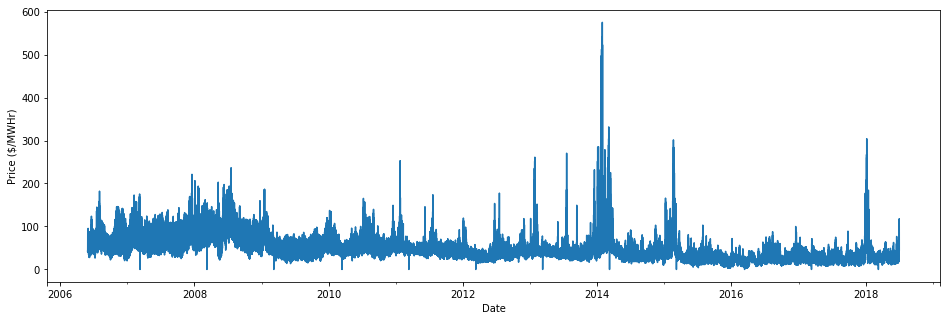

In [22]:
ax = df_prime.plot(figsize=(16, 5), legend=None)
_ = ax.set_ylabel('Price ($/MWHr)')
plt.savefig('hourly-price-data.pdf')
plt.savefig('hourly-price-data.svg')

# Convert Timestamps

In [23]:
# the groups to use for groupby and their associated names
groups = [
    df_prime.index.year, 
    df_prime.index.month, 
    df_prime.index.day, 
    df_prime.index.hour,
]
groups_names = [
    'Year', 
    'Month', 
    'Day', 
    'Hour',
]
# group the fuel data by time stamp and fuel category
df_prime = df_prime.groupby(groups).mean()
df_prime.index.names = groups_names
df_prime = df_prime.reset_index()

# Save

In [24]:
df_prime.to_csv('dataset.gz', compression='gzip', index=False)

# Test

In [25]:
pd.read_csv('dataset.gz').head()

,Year,Month,Day,Hour,Price
0,2006,5,30,1,42.67163
1,2006,5,30,2,40.79495
2,2006,5,30,3,39.94001
3,2006,5,30,4,39.87746
4,2006,5,30,5,40.58643
